In [36]:
# @title Data preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.drop('customerID', axis=1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

df = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Cleaned Data Preview:")
print(df.head())


print("\nData Types and Non-Null Counts:")
print(df.info())

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


print("\nChurn Value Counts:")
print(df['Churn'].value_counts())

Cleaned Data Preview:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0 -1.280248       -1.161694     -0.994194      0        False   
1              0  0.064303       -0.260878     -0.173740      0         True   
2              0 -1.239504       -0.363923     -0.959649      1         True   
3              0  0.512486       -0.747850     -0.195248      0         True   
4              0 -1.239504        0.196178     -0.940457      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False 

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

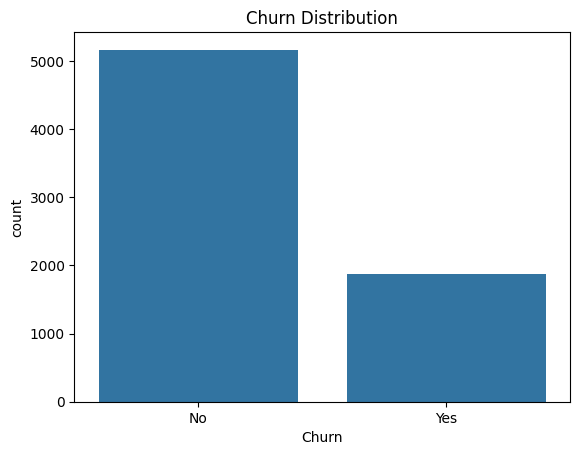

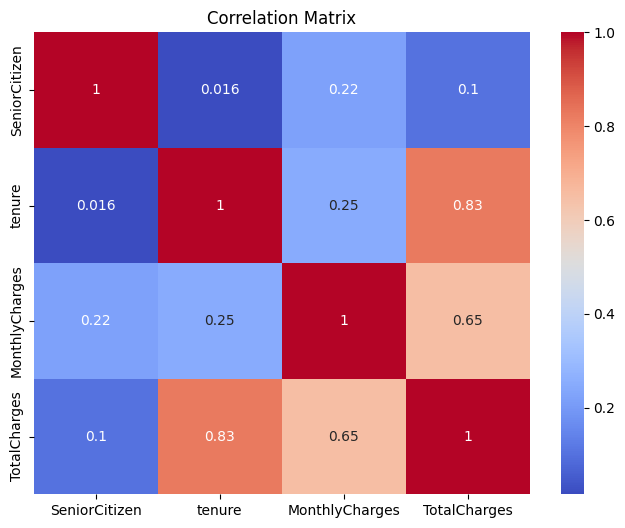

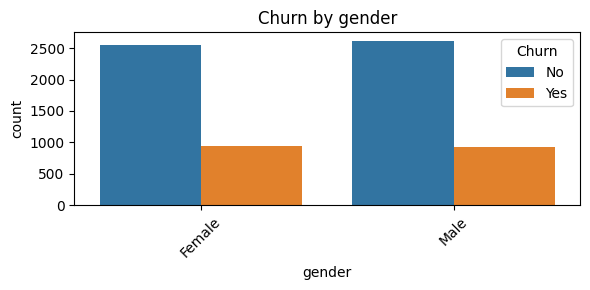

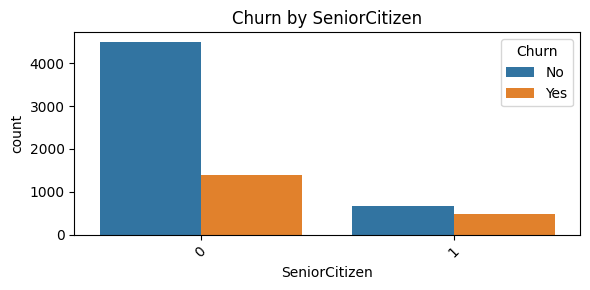

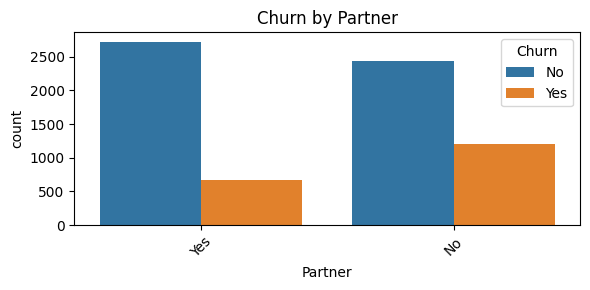

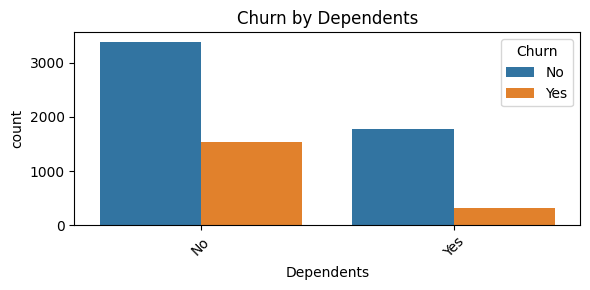

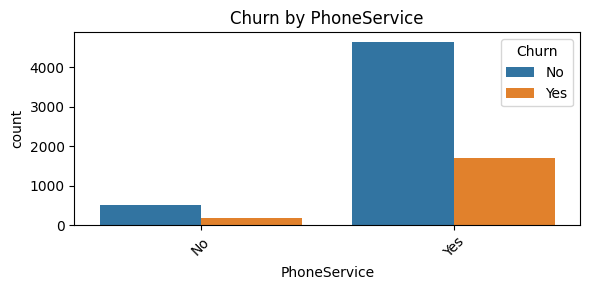

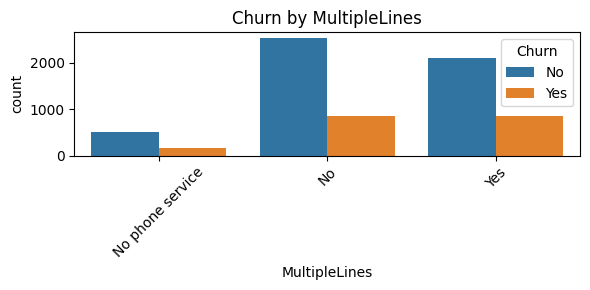

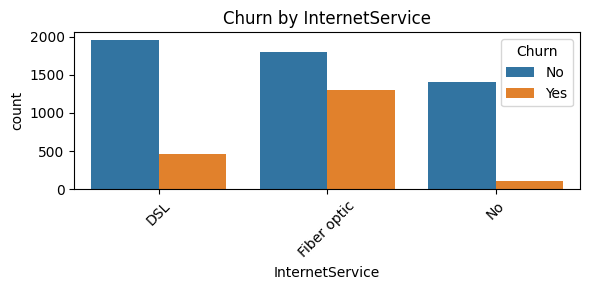

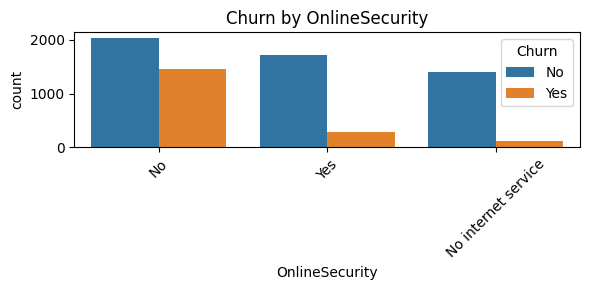

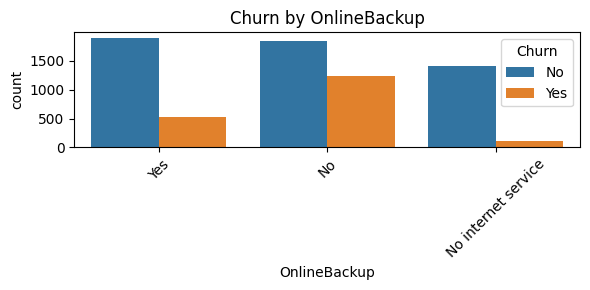

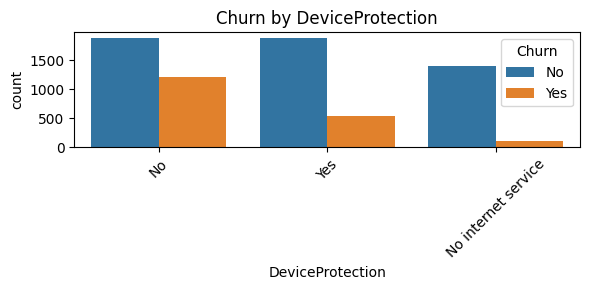

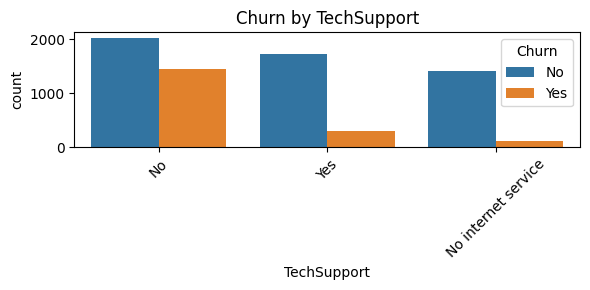

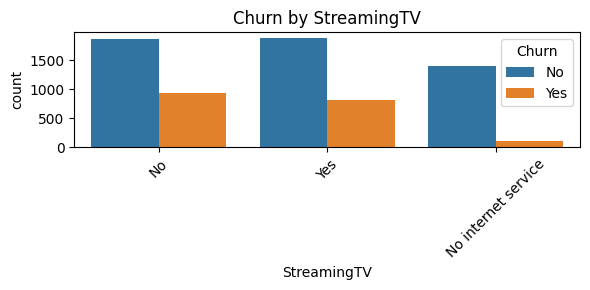

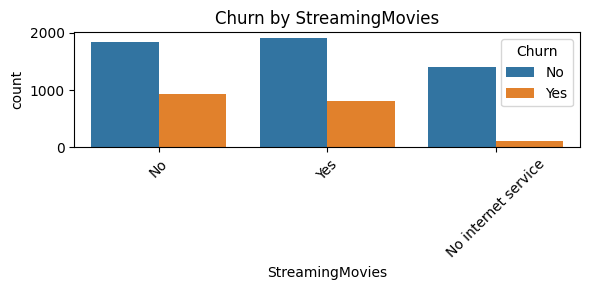

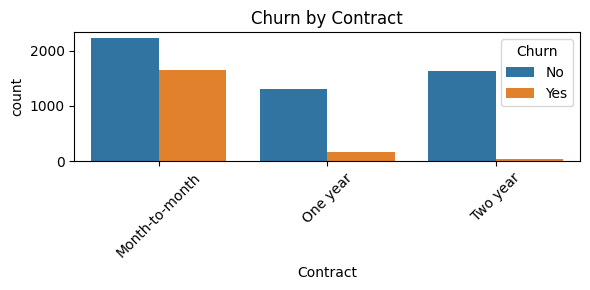

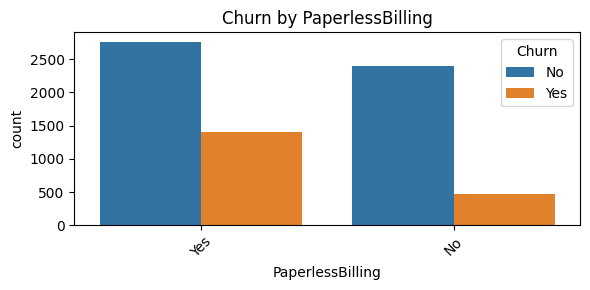

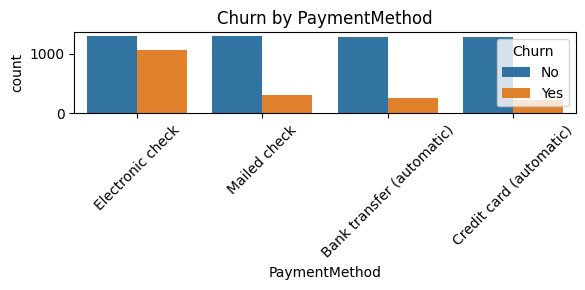

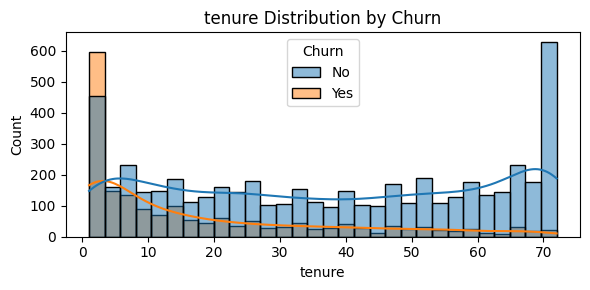

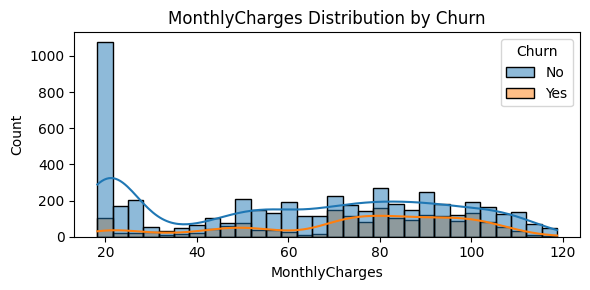

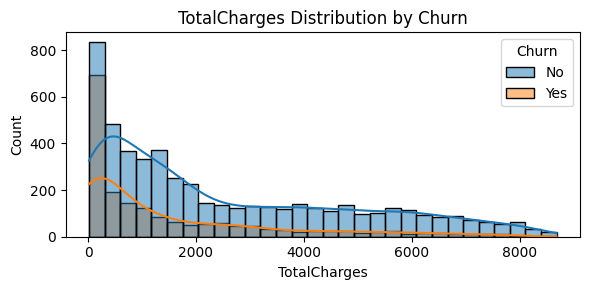

In [37]:
# @title EDA ,feature eng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")


print(df.shape)
print(df.info())
print(df.describe())
print(df['Churn'].value_counts(normalize=True))

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()
numeric_features = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'{col} Distribution by Churn')
    plt.tight_layout()
    plt.show()

In [38]:
# @title model building

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


X = data.drop('Churn', axis=1)
y = data['Churn']


categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.7884524372929484
Random Forest Confusion Matrix:
 [[1415  124]
 [ 323  251]]
Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.92      0.86      1539
         Yes       0.67      0.44      0.53       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



Random Forest Model Evaluation:
Accuracy  : 0.7875
Precision : 0.6559
Recall    : 0.4582
F1 Score  : 0.5395
AUC ROC   : 0.8332


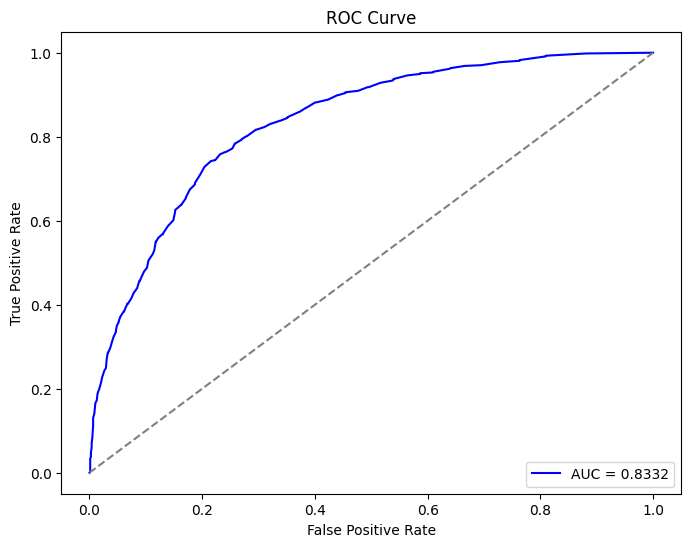

In [41]:
# @title model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X_train = X_train.drop(columns=['customerID'], errors='ignore')
X_test = X_test.drop(columns=['customerID'], errors='ignore')

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]


if y_test.dtype == 'object':
    y_test_binary = y_test.map({'No': 0, 'Yes': 1})
    pos_label = 'Yes'
else:
    y_test_binary = y_test
    pos_label = 1


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=pos_label)
recall = recall_score(y_test, y_pred, pos_label=pos_label)
f1 = f1_score(y_test, y_pred, pos_label=pos_label)
auc_roc = roc_auc_score(y_test_binary, y_pred_prob)


print("Random Forest Model Evaluation:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"AUC ROC   : {auc_roc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()